In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [4]:
# Step 3: Understand Dataset
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome'

In [5]:
# Step 4: Handle Missing Values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [6]:
# Step 5: Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)


In [7]:
# Step 6: Calculate Mean of Variables
x_mean = df["ApplicantIncome"].mean()
y_mean = df["LoanAmount"].mean()
print("\nMean of ApplicantIncome:", x_mean)
print("Mean of LoanAmount:", y_mean)


Mean of ApplicantIncome: 5403.459283387622
Mean of LoanAmount: 145.75244299674267


In [8]:
# Step 7: Manually Calculate Regression Coefficients
numerator = ((df["ApplicantIncome"] - x_mean) * (df["LoanAmount"] - y_mean)).sum()
denominator = ((df["ApplicantIncome"] - x_mean) ** 2).sum()
B1 = numerator / denominator
B0 = y_mean - (B1 * x_mean)

In [9]:
print("\nCalculated Slope (B1):", B1)
print("Calculated Intercept (B0):", B0)


Calculated Slope (B1): 0.007781215489966961
Calculated Intercept (B0): 103.70696192144112


In [10]:
# Step 8: Predict LoanAmount Using Regression Equation
df["Predicted_LoanAmount"] = B0 + B1 * df["ApplicantIncome"]


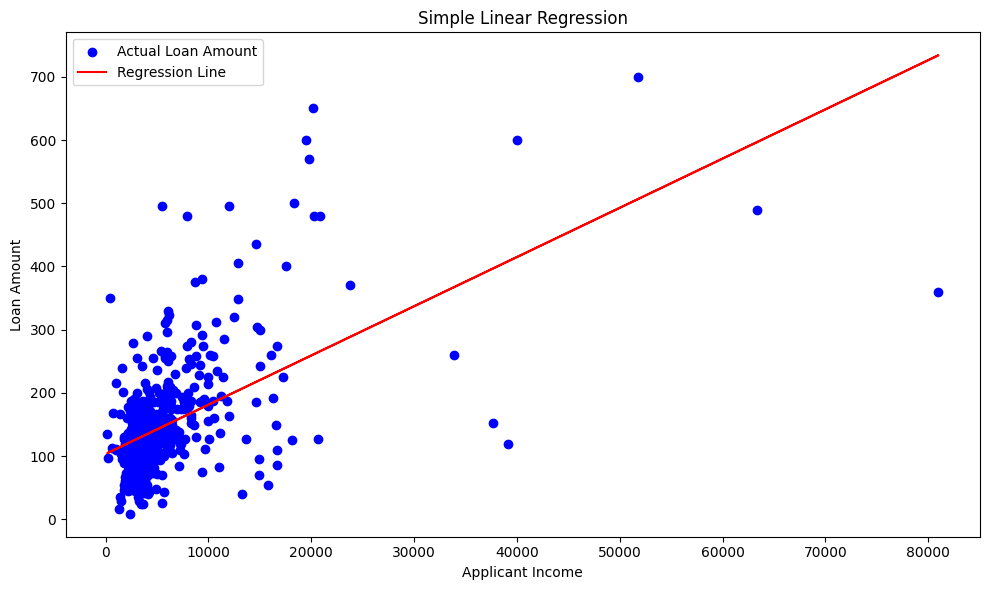

In [11]:
# Step 9: Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(df["ApplicantIncome"], df["LoanAmount"], color='blue', label="Actual Loan Amount")
plt.plot(df["ApplicantIncome"], df["Predicted_LoanAmount"], color='red', label="Regression Line")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Simple Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Step 10: Calculate RMSE
rmse = np.sqrt(((df["LoanAmount"] - df["Predicted_LoanAmount"]) ** 2).mean())
print("\nRoot Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 69.32918794246228
